## CS156 Pre-class Work 12.1

**`Topic Modeling` | `Latent Dirichlet Allocation (LDA)`**

### Book Reviews and How to Fake Them
Find an interesting public domain book and download it as plain text.

- Use Python to massage the data into a suitable format for processing by the Latent Dirichlet Allocation (LDA) model contained in `scikit.learn`. This will include removing stop words and punctuation. Some ideas for how to do this can be found [here](https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python).
- Break the book up into small sections. The most appropriate level might vary between books, but you will most likely be breaking the book up into either paragraphs or chapters (this might also be a pragmatic decision based on whatever's easiest).
- Train an LDA model on the corpus. The LDA model should find interesting topics that occur at the paragraph (or chapter) level. Be sure to explain your choice of parameters for any parameters that might have a significant effect on the model results.
- Print out the first ten words of the ten most common topics.

### 1. Library Importation

In [227]:
import re #regular expressions
from cleantext import clean
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### 2. Load the txt file

In [228]:
#Load the text file
text = open('dracula.txt', 'rb').read().decode(encoding='utf-8')

#Quick snippet
text[:500]

'\ufeffThe Project Gutenberg eBook of Dracula, by Bram Stoker\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this'

### 3. Clean the file

#### a. Removing unimportant text

In [229]:
#Get rid of the preface, project gutenberg description, etc.
#Begin with the first Stave
text = text.replace('\n',' ').replace('\r','')
text = re.sub(r"^.*?CHAPTER I  JONATHAN", "CHAPTER I JONATHAN", text)
text[:500]

"CHAPTER I JONATHAN HARKER'S JOURNAL  (_Kept in shorthand._)   _3 May. Bistritz._--Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an hour late. Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little I could walk through the streets. I feared to go very far from the station, as we had arrived late and would start as near the correct time as possible. The impression I had was that"

#### b. Split into chapters

In [230]:
#Get first 10 chapters
chapters = re.split('CHAPTER \w+',text)[:11]
chapters.remove('')

#Quick snippet
for idx,chapter in enumerate(chapters):
    print(f"Chapter {idx+1}:",chapter[:50],'\n')

Chapter 1:  JONATHAN HARKER'S JOURNAL  (_Kept in shorthand._) 

Chapter 2:   JONATHAN HARKER'S JOURNAL--_continued_   _5 May. 

Chapter 3:   JONATHAN HARKER'S JOURNAL--_continued_   When I  

Chapter 4:   JONATHAN HARKER'S JOURNAL--_continued_   I awoke 

Chapter 5:   _Letter from Miss Mina Murray to Miss Lucy Weste 

Chapter 6:   MINA MURRAY'S JOURNAL   _24 July. Whitby._--Lucy 

Chapter 7:   CUTTING FROM "THE DAILYGRAPH," 8 AUGUST   (_Past 

Chapter 8:   MINA MURRAY'S JOURNAL   _Same day, 11 o'clock p. 

Chapter 9:    _Letter, Mina Harker to Lucy Westenra._  "_Buda 

Chapter 10:    _Letter, Dr. Seward to Hon. Arthur Holmwood._   



#### c. Further text cleaning 
Stopword removal, casefolding, punctuation removal, etc.

In [231]:
for idx in range(len(chapters)):
    
    chapters[idx] = clean(chapters[idx],
                             punct=True,
                             stopwords=True,
                             lowercase=True,
                             extra_spaces=True,
                             stp_lang='english')
    
    
#Quick snippet
for stave in chapters:
    print(stave[:50],'\n')

jonathan harkers journal kept shorthand 3 may bist 

jonathan harkers journalcontinued 5 mayi must asle 

jonathan harkers journalcontinued found prisoner s 

jonathan harkers journalcontinued awoke bed dreamt 

letter miss mina murray miss lucy westenra 9 may d 

mina murrays journal 24 july whitbylucy met statio 

cutting dailygraph 8 august pasted mina murrays jo 

mina murrays journal day 11 oclock p moh tired mad 

letter mina harker lucy westenra budapesth 24 augu 

letter dr seward hon arthur holmwood 6 september d 



### 4. Implement LDA using Scikit learn

#### a. Define relevant variables

In [232]:
#Define variables
N_FEATURES = 10000
N_COMPONENTS = 10
N_TOP_WORDS = 10

#### b. Generate TF-IDF Features

Adapted from [Sklearn](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py) and [Machine Learning Geek](https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/)

In [248]:
#Vectorize document using TF-IDF
#Words occurring in at least 75% of the documents are removed.
tf_idf = TfidfVectorizer(max_df = 0.70, 
                         stop_words="english")

#Fit and Transform the documents
train_data = tf_idf.fit_transform(chapters)   

#### c. Perform LDA

In [252]:
#Create LDA object
model = LatentDirichletAllocation(n_components = N_COMPONENTS)

#Fit and Transform LDA model on data
lda_matrix = model.fit_transform(train_data)

### 5. Plot top words from LDA

In [253]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

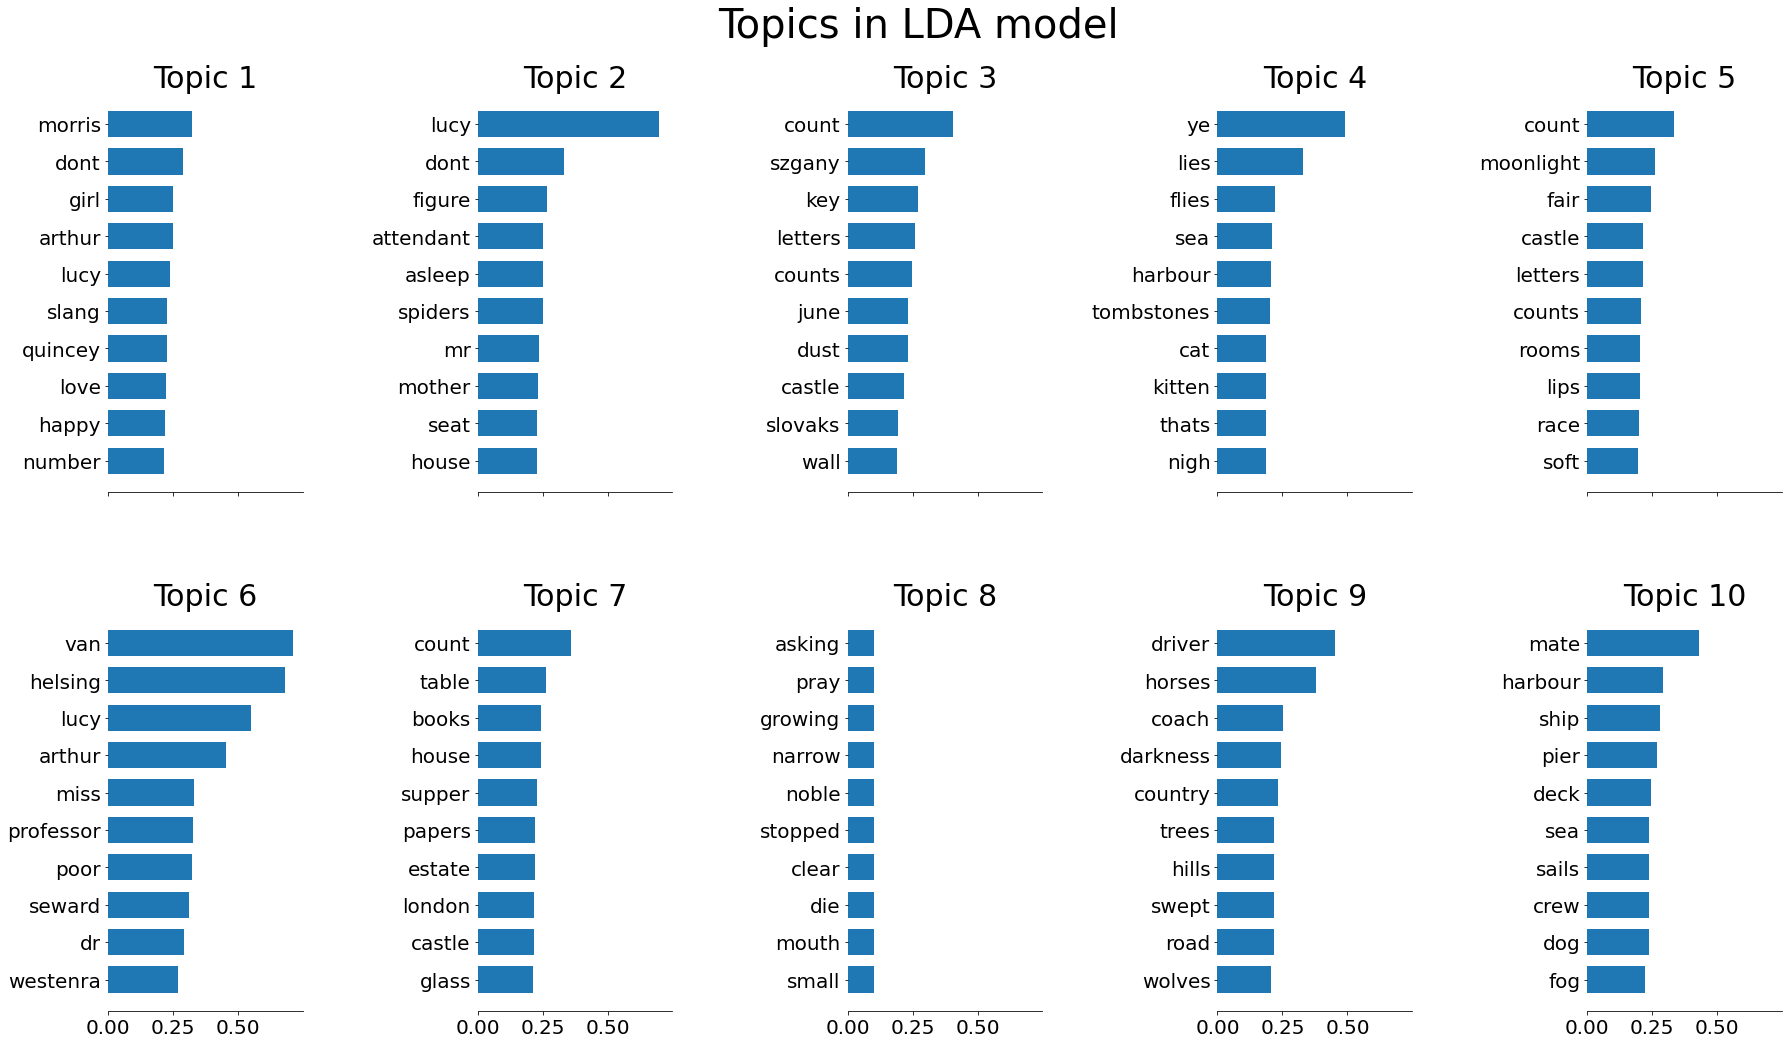

In [254]:
tf_feature_names = tf_idf.get_feature_names()
plot_top_words(model, tf_feature_names, N_TOP_WORDS, "Topics in LDA model")

In [255]:
from scipy.stats import poisson

206